# Programming Machine Learning

**Final Exam** (07 March 2024)
**Time** : 120 Mins

Intructions:

- You are to follow the provided pseudocode for your solution as closely as possible.
- You are not allowed to use your smartphone, or connect to the internet through any other means. Please place your smartphone in your backpacks/laptop bags.
- Bathroom breaks are allowed one person at a time by submitting your smartphone at the front desk.
- The submission will take place via LearnWeb. To submit your solution:
    1. Name your submissions by prefixing your matriculation number to the filename. Example, if your MR is 12345 then rename the files as **"12345_exam_sheet.xxx"**
    1. Prepare a PDF/HTML export of your code.
    1. Come to the front.
    1. Connect to the Internet and upload your solution (both code as well as the PDF/HTML export) to LearnWeb.
    1. Leave the room immediately after.

## Exercise 1 : F1-Score (5 Points)

The F1-score is a statistical measure used in machine learning and can be interpreted as the harmonic mean of precision and recall. It is designed to provide one single score to express the performance of a model, simplifying comparison between different models. 

You are required to implement a Python function to calculate the F1-score for binary classification from scratch, using lists of ground truths and predictions as its input. Your function should accept **two python lists**: one with the ground truths (actual values) and another one with the predicted values. The lists will contain binary values (0's and 1's) where 1 represents a positive class and 0 represents a negative class. F1-Score is calculated as follows:

`F1-score = 2 * ((precision * recall) / (precision + recall))`

where 
- `precision = true_positives / (true_positives + false_positives)` 
- `recall = true_positives / (true_positives + false_negatives)`.
- `True Positives (TP)`: These are the correctly predicted positive values which means that the value of the actual class is 1 and the value of the predicted class is also 1.
- `True Negatives (TN)`: These are the correctly predicted negative values which means that the value of the actual class is 0 and the value of the predicted class is also 0.
- `False Positives (FP)`: When the actual class is 0 and predicted class is 1.
- `False Negatives (FN)`: When the actual class is 1 but the predicted class in 0.



Pseudocode:
```
- Check if the lenght of both input lists are equal, otherwise return "Incompatible lengths!" 
- Calculate and print TP, TN, FP and FN.
- Calculate if we may get a zero in any of the denomniators (if yes, return 0)
- Calculate and print Precision
- Calculate and print Recall
- Calculate and return the F1-score
```

**Note: Take care of the edge cases where we're get a zero in the denominator while calculating Precision, Recall or the F1 Score. In case the denominator is 0, just return 0.**

**Do not use numpy in the first exercise**

In [14]:
import numpy as np
import matplotlib.pyplot as plt


In [11]:
## Write your code here:

def f1_score(ground_truths, predictions): 
    if len(ground_truths) != len(predictions):
        raise Exception("Incompatible lengths!")
    true_positives = 0
    true_negatives = 0
    false_positives = 0
    false_negatives = 0
    for ground_truth, prediction in zip(ground_truths, predictions):
        if (ground_truth == 1) & (prediction == 1):
            true_positives += 1
        elif (ground_truth == 0) & (prediction == 0):
            true_negatives += 1
        elif (ground_truth == 0) & (prediction == 1):
            false_positives += 1
        elif (ground_truth == 1) & (prediction == 0):
            false_negatives += 1
    print(f'TP = {true_positives}')
    print(f'TN = {true_negatives}')
    print(f'FP = {false_positives}')
    print(f'FN = {false_negatives}')
    if (true_positives + false_positives == 0) or (true_positives + false_negatives == 0):
        return 0
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    print(f"precision = {precision}")
    print(f"recall = {recall}")
    if precision + recall == 0:
        return 0
    f1_score = 2 * ((precision * recall) / (precision + recall))
    return f1_score

In [12]:
### Code for generating sampe data and running the function 
### You don't need to modify this but you can use this for debugging.
import numpy as np

size_of_array = 32
predictions = np.random.randint(low=0,high=2,size=(size_of_array)).tolist()
ground_truths = np.random.randint(low=0,high=2,size=(size_of_array)).tolist()

f1_score(ground_truths, predictions)

TP = 6
TN = 11
FP = 8
FN = 7
precision = 0.42857142857142855
recall = 0.46153846153846156


0.4444444444444445

## Exercise 2 : PCA (15 Points)

Principal Component Analysis (PCA) is a dimensionality reduction technique that is commonly used in machine learning and data visualization. Using linear algebra principles, it projects the original features onto a new coordinate system with orthogonal vectors, which are the principal components.

The task is to write a Python function named `my_pca` which will perform PCA using only numpy operations and following the provided pseudocode. Your function should have the following signature:

``` python
def my_pca(X, n_components):
    pass

```

Input: 
-   `X`, a `n_samples × d` dimensional matrix (`n_samples`: number of observations, `d`: number of variables)
-   `n_components`, an integer indicating the desired number of components

Output: 
-   `PCA_Output`, output dataset represented in the new feature subspace. Dimension of the output would be (`n_samples x n_components`)


Pseudocode is given by

1. Compute the mean of the columns of X and store in meanX. 

2. Normailize the dataset: 
        $$X\_normal = X - meanX$$
3. Compute the covariance matrix of X_normal, store in cov_matrix. Formula for covariance matrix is given as:
        $$cov\_matrix(Z) = \frac{1}{(len(Z) - 1)}* (Z^T \times Z)$$
        *Do **NOT** use numpy's built-in function np.cov()*.

4. Compute the eigenvalues and eigenvectors of cov_matrix, store them in eigenvalues and eigenvectors.
        you should use numpy's built-in function np.linalg.eig(cov_matrix) for this.

5. Find the indices which sort the eigenvalues in decending order, store in inds. (check below notes for hint)

6. Use the inds to sort the eigenvectors in decreasing order.
        (This step does not change the dimension of eigenvalues and eigenvectors)
7. Select the first `n_components` rows of the sorted eigenvectors to get the matrix of chosen eigenvectors and store it in W.

8. Multiply X_normal matrix with W matrix to get PCA_Output (the data represented in the principal component space).

        (Dimesion of PCA_Output should be [n_samples,n_components])

9. Return PCA_Output

10. Plot the first 2 dimensions of the output (`PCA_Output`) from the sample data provided below. Use a different colour for both classes. The plot should look like the example shown below, *do not forget to add appropriate labels* (i.e label both axes, add title and legend):

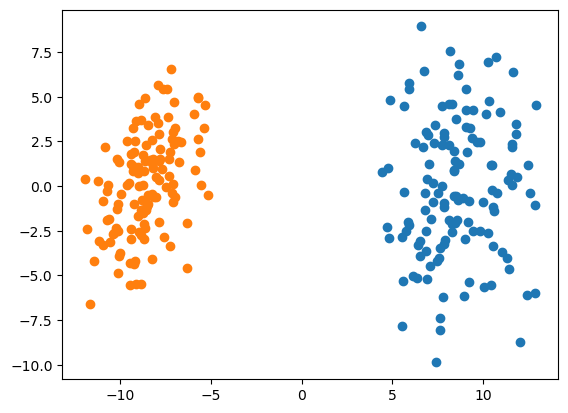

Notes:

1. In case you get struck, check if the dimensions of matrices you are working with are correct.  
1. Remember to sort the eigenvectors in **decreasing** order of the eigenvalues. 
1. Do not use Sklearn for this exercise

In [83]:
def covar(z):
    return (1 / (len(z) - 1)) * np.matmul(z.T, z)

def my_pca(X, n_components):
    #first perform mean centering of the data
    meanX = np.mean(X , axis = 0)
    X_centered = X - meanX
    cov_matrix = covar(X_centered)
    eigh_vals, eigh_vecs = np.linalg.eigh(cov_matrix)
    inds = np.argsort(eigh_vals)[::-1] #argsort sort ascendingly we want in descending fashion therefore inverting
    sorted_eighvals = eigh_vals[inds] #from index get the values themselves
    sorted_eighvecs = eigh_vecs[:,inds] #from index get the vector themselves
    W = sorted_eighvecs[:,:n_components]
    X_reduced = (W.T @ X_centered.T).T
    return X_reduced

In [84]:
### Code for generating sampe data and running the function 
### You don't need to modify this but you can use this for debugging.
from sklearn.datasets import make_classification

n_samples, d, n_components= 256, 12, 4

X, y = make_classification(n_samples=n_samples, n_features=d, n_informative=d-3, n_redundant=2, n_repeated=1,
                n_clusters_per_class=1, class_sep=3, flip_y=0, random_state=42)
PCA_Output = my_pca(X,n_components)


Text(0, 0.5, 'feature 2')

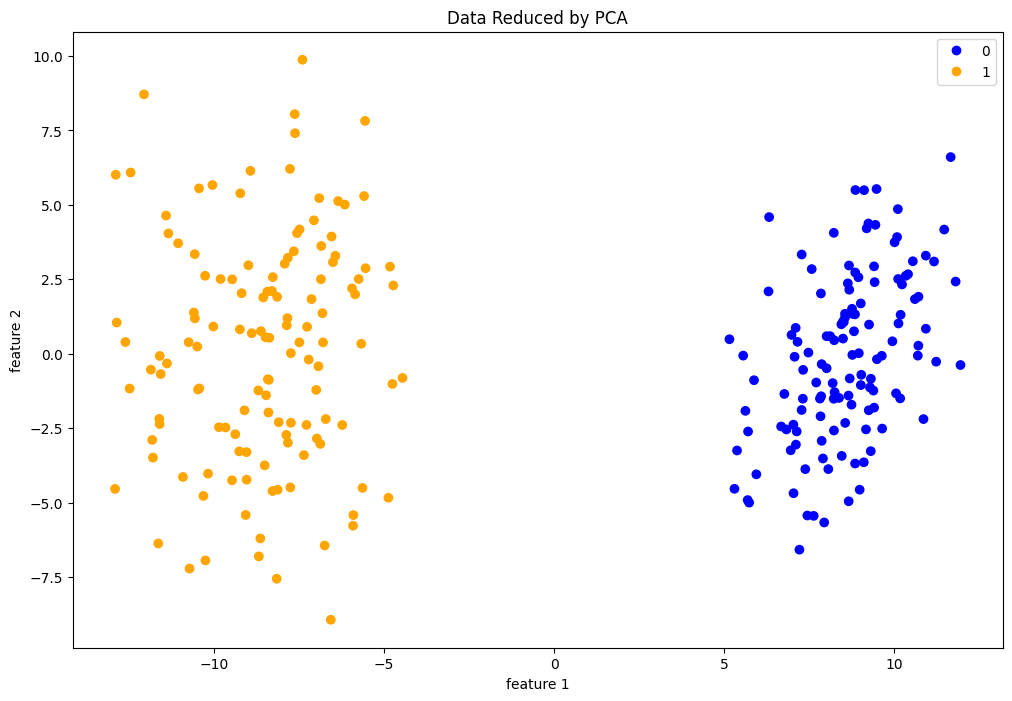

In [85]:
### Write your code here for plotting
from matplotlib.colors import ListedColormap

plt.figure(figsize=(12,8))
classes = ['0', '1']
colors = ListedColormap(['b','orange'])
scatter = plt.scatter(PCA_Output[:,0],PCA_Output[:,1],c=y, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('Data Reduced by PCA')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

## Exercise 3 : Mini-Batch Gradient Descent for Logistic Regression (20 Points)

In this question, you are required to implement mini-batch Gradient Descent for logistic regression from scratch. 
- Your function should employ a mini-batch learning approach where the mini-batches are sampled randomly from the dataset.
- The function should be coded in Python and have appropriate stopping criteria, based on a specified number of maximum iterations or when the absolute difference between the previous and current loss is less than a predefined threshold.
- Also, track the history of the loss function over iterations.

You need to code the following helper functions:
1. A prediction function that takes $X$ and $\theta$ as input and predicts $\hat Y$ as:
   
   $\hat y^{(i)} = \frac{1}{1+e^{-\theta^T \times x^{(i)}}}$
1. A loss function that takes ground truth $y$ and predicted $\hat y$ as input and calculates the loss $J(\theta)$ as:
    
   $J(\theta) = -\frac{1}{k} \sum_{i=1}^{k} [y^{(i)} \log (\hat y^{(i)}) + (1-y^{(i)}) \log (1-\hat y^{(i)})]$
1. A gradient function which takes as input $X$, ground truth $y$ and predicted $\hat y$ as input and calculates the gradient $\Delta \theta$ as:

   $\Delta \theta = \frac{1}{k} \sum_{i=1}^k {(\hat y^{(i)} - y^{(i)}) \cdot x^{(i)}}$ 


The choice to code these helper functions as element-wise functions or vectorized functions is left to the student. *(Hint: The dot product operation can be thought of as multiplying corresponding elements of arrays, and then summing those products)*


**Algorithm: Mini-Batch Logistic Regression**

1. Inputs: 
   * Feature set `X` (numpy 2D array of size $[num\_samples \times features]$)
   * Target set `y` (numpy 1D array of size $[num\_samples]$)
   * Learning Rate `eta` (default value = 0.01)
   * Batch size `batch_size` (default value = 512)
   * Maximum iterations `max_iter` (default value = 1000)
   * Threshold `threshold` (default value = 1e-5)
2. Initialize parameters `theta` with zeros (or small random values) based on size of `X` i.e. `[num_features]`.
3. Initialize `loss_history` as an empty list.
4. For `iter` in range(`max_iter`):
    1. Randomly pick `k` data points $(x^{(i)},y^{(i)})$ from the data set X and y, where `k` is the `batch_size`.
    2. Compute the prediction $\hat y$ for selected batch points using the helper function.
    3. Compute the logistic loss function $J(\theta)$ using selected batch points using the helper function
    4. Append the computed loss to the loss history.
    5. Compute the gradient $\Delta \theta$ using the helper function.
    6. Update the weights according to the computed gradient:
      $\theta = \theta - \eta * \Delta \theta$
      
    7.  Check the stopping criteria. If the absolute difference between the current loss and the previous loss is less than a certain threshold, stop the iteration. 
5. Return `theta`, `loss_history`


Once you have a working implemenation, you need to
- Report training and testing accuracies on the sample data provided below.
- Plot the loss_history using a simple line plot. Please label the plot appropriately.
- Do not use Sklearn for this exercise

In [71]:
### Write your code here
import numpy as np


def pred_func(X, B):
    return 1./(1+np.exp(-np.matmul(X,B)))

def loss_func( X, y, B):
        N = len(X)
        p = 1./(1+np.exp(-np.dot(X,B)))
        return (-1 / N) * np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

def grad_func(X, y, B):
    N = len(X)
    p = 1./(1+np.exp(-np.dot(X,B)))
    return (1/N)*np.dot(X.T,(p-y))

def random_sampler(X, y, batch_size):
    ind = np.random.choice(range(len(X)), batch_size, replace=False)
    return X[ind], y[ind]

def mini_batch_logistic_regression(X, Y, max_iter=1000,tolerance=1e-5,lr=0.01, batch_size = 512):
    #function for updating parameters using SGD
    loss_list = []
    B = np.random.uniform(0.0, 1.0, size=(X.shape[1],)) 
    for it in range(max_iter):
        #sample a random x and y batch for training and validation
        x, y = random_sampler(X, Y , batch_size)
        
        # prediction
        y_hat = pred_func(x, B)
        #calculating the loss
        curr_loss = loss_func(x, y, B)
        
        loss_list.append(curr_loss)
        # gradient
        gd = grad_func(x, y, B)
        #update the betas
        B = B - lr*gd
        
        #stop loop once updation becomes insignificant
        if (np.abs(curr_loss - loss_list[len(loss_list) - 2]) < tolerance):
            break

    return B, loss_list

In [72]:
### Code for generating sampe data and running the function 
### You don't need to modify this but you can use this for debugging.

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=24, n_informative=18, n_redundant=4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Adding bias term
X_train = np.hstack([X_train,np.ones(shape=(X_train.shape[0],1))])
X_test = np.hstack([X_test,np.ones(shape=(X_test.shape[0],1))])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 25), (200, 25), (800,), (200,))

In [ ]:
theta, loss_hist = mini_batch_logistic_regression(X_train, y_train)

In [79]:
### Write your code here for accuracy calculation and plot
test_predictions = pred_func(X_test, theta)
test_predictions = np.where(test_predictions >= 0.5, 1 , 0)
train_predictions = pred_func(X_train, theta)
train_predictions = np.where(train_predictions >= 0.5, 1 , 0)
print(f'training accuracy is {np.sum(train_predictions == y_train) / len(y_train)}')
print(f'testing accuracy is {np.sum(test_predictions == y_test) / len(y_test)}')

training accuracy is 0.77
testing accuracy is 0.725


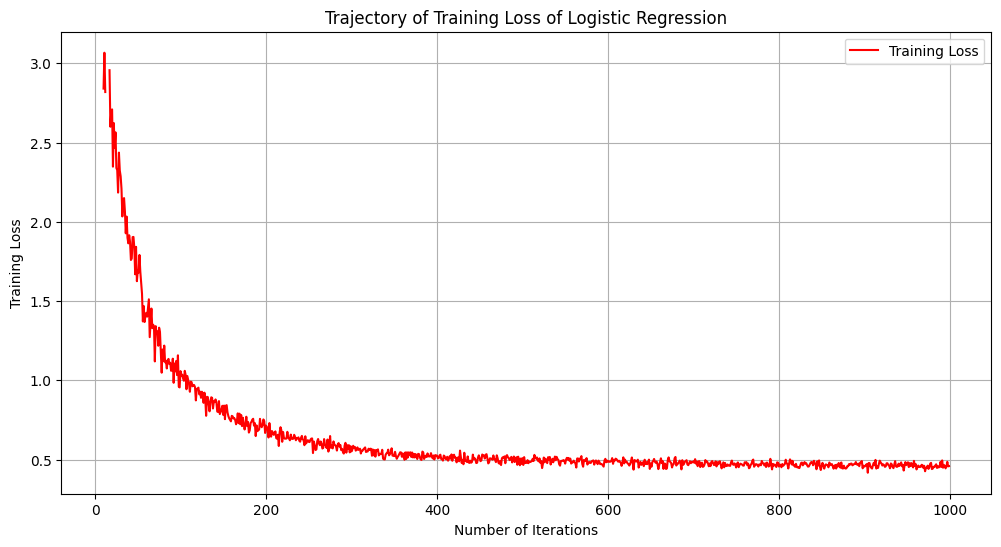

In [81]:
#Trajectory of the Loss
plt.figure(figsize=(12,6))
plt.plot(np.arange(len(loss_hist)),loss_hist,color='red',label='Training Loss')
plt.title('Trajectory of Training Loss of Logistic Regression')
plt.xlabel('Number of Iterations')
plt.ylabel('Training Loss')
plt.legend()
plt.grid('on')